# Chiller plant decision tree analysis

The purpose of this notebook is to analyze the features and data with decision trees.

In [51]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
import seaborn as sns
import glob
import os
from dataCleaning import bas_filter
%matplotlib inline

In [52]:
df_plt1, key = bas_filter.data_import(
    '../../Plt1', 'Plt1 h', 
    '../../Plt1/Plt1 Points List.xlsx')

['../../Plt1\\Plt1 h 2016-11.csv', '../../Plt1\\Plt1 h 2017-01.csv', '../../Plt1\\Plt1 h 2017-03.csv', '../../Plt1\\Plt1 h 2017-05.csv', '../../Plt1\\Plt1 h 2017-07.csv', '../../Plt1\\Plt1 h 2017-09.csv']


(0.2, 1.0)

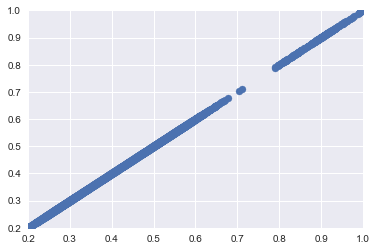

In [58]:
plt.scatter(df_plt1['kW/Ton'], df_plt1['kW/Ton'])
plt.xlim(xmax=1.0)
plt.xlim(xmin=0.2)
plt.ylim(ymax=1.0)
plt.ylim(ymin=0.2)

In [3]:
bas = bas_filter.data_BAS(df_plt1, key)
bas.shape

CommunicationFailure_COV
CH3COM1F
CH3Ready
CH4COM1F
CH4Ready
CH4SURGE
CH5COM1F
CH5Ready
Original data contains 8516 points and 414 dimensions.
Filtered data contains 8115 points and 193 dimensions.


(8115, 193)

In [4]:
key_alarm = key[key['Units'].str.contains("Normal/Alarm")==True]
key_alarm_BAS = key_alarm.loc[key['PointType'].str.contains("BAS")==True, 'DataPointName']
print(key_alarm_BAS)

274    CommunicationFailure
299              CTTR_ALARM
365            PCHWP3Failed
372            PCHWP4Failed
379            PCHWP5Failed
420            SCHWP3Failed
427            SCHWP4Failed
434            SCHWP5Failed
Name: DataPointName, dtype: object


In [5]:
for alm in key_alarm_BAS:
    bas = bas[bas[alm] == 0]
bas = bas[bas['OptimumControl'] == 1]

In [6]:
bas.shape

(7952, 193)

In [7]:
bas1 = bas_filter.alarm_filter(bas, key)
bas1.shape

(7952, 193)

In [8]:
#df_plt1 = pd.read_csv('../../Plt1/Plt1 h 2017-09.csv')
#df = pd.read_csv('../../Plt1/Plt1 h 2017-09.csv')
#df_plt2 = pd.read_csv('../../Plt2/Plt2 h 2017-07.csv')

In [9]:
df_plt1.dropna()

,BASMODE,CDWDT,CDWP3Failed,CDWP3HZ,CDWP3S,CDWP3SPD,CDWP3SPD_Alarm,CDWP3SS,CDWP3kW,CDWP4Failed,...,kW/Ton_InLoopFollow,kW/Ton_InLoopNotFollow,kW/Ton_OutLoop,kWh,kWh Delta,kWhSqFt,kWh_InLoopFollow,kWh_InLoopNotFollow,kWh_OutLoop,timestamp
4972,1.0,7.059722,0.0,30.000000,0.583333,49.999800,0.333333,0.583333,5.258333,0.0,...,0.548666,0.0,0.0,202.833333,140.420591,0.000862,202.833333,0.0,0.0,2017-06-06T11:00:00.000Z
4973,1.0,4.702779,0.0,50.000000,1.000000,83.333000,1.000000,1.000000,8.200000,0.0,...,0.509350,0.0,0.0,191.574999,147.253933,0.000815,191.574999,0.0,0.0,2017-06-06T12:00:00.000Z
4974,1.0,5.238891,0.0,50.000000,1.000000,83.333000,0.833333,1.000000,8.200000,0.0,...,0.518651,0.0,0.0,222.183334,174.941748,0.000945,222.183334,0.0,0.0,2017-06-06T13:00:00.000Z
4975,1.0,5.194445,0.0,50.000000,1.000000,83.333000,0.916667,1.000000,8.200000,0.0,...,0.528449,0.0,0.0,219.241667,162.004918,0.000932,219.241667,0.0,0.0,2017-06-06T14:00:00.000Z
4976,1.0,6.031944,0.0,50.000000,1.000000,83.333000,1.000000,1.000000,8.200000,0.0,...,0.504556,0.0,0.0,198.258333,157.563835,0.000843,198.258333,0.0,0.0,2017-06-06T15:00:00.000Z
4977,1.0,6.454166,0.0,50.000000,1.000000,83.333000,1.000000,1.000000,8.200000,0.0,...,0.501159,0.0,0.0,181.083335,143.992602,0.000770,181.083335,0.0,0.0,2017-06-06T16:00:00.000Z
4978,1.0,6.304166,0.0,50.000000,1.000000,83.333000,1.000000,1.000000,8.200000,0.0,...,0.515003,0.0,0.0,181.075001,133.887335,0.000770,181.075001,0.0,0.0,2017-06-06T17:00:00.000Z
4979,1.0,6.512498,0.0,50.000000,1.000000,83.333000,1.000000,1.000000,8.200000,0.0,...,0.506791,0.0,0.0,185.399999,144.003373,0.000788,185.399999,0.0,0.0,2017-06-06T18:00:00.000Z
4980,1.0,6.274998,0.0,50.000000,1.000000,83.333000,1.000000,1.000000,8.200000,0.0,...,0.494802,0.0,0.0,174.358334,145.637704,0.000741,174.358334,0.0,0.0,2017-06-06T19:00:00.000Z
4981,1.0,5.750002,0.0,50.000000,1.000000,83.333000,1.000000,1.000000,8.200000,0.0,...,0.503704,0.0,0.0,160.358334,126.371150,0.000682,160.358334,0.0,0.0,2017-06-06T20:00:00.000Z


In [10]:
key = pd.read_excel('../../Plt1/Plt1 Points List.xlsx')

In [11]:
key_bas = key.loc[key['PointType'].str.contains("BAS")==True,'DataPointName']
vals = key_bas.values.T.tolist()
vals.append('kW/Ton')
print(vals)

['CDWVLV', 'CDWVLV2', 'CHkW', 'CHWDP2', 'CHWFLO', 'CHWRT', 'CHWRT2', 'CHWRT3', 'CHWST', 'CHWST2', 'CHWST3', 'CHWV10', 'CHWV11', 'CHWV12', 'CHWV13', 'CHWV14', 'CHWV15', 'CHWV16', 'CHWV17', 'CHWV18', 'CHWV19', 'CHWV20', 'CHWV21', 'CHWV22', 'CHWV23', 'CHWV24', 'CHWV25', 'CHWV26', 'CHWV27', 'CHWV3', 'CHWV4', 'CHWV5', 'CHWV6', 'CHWV7', 'CHWV9', 'CLGMODE', 'CommunicationFailure', 'CommunicationFailure_COV', 'CTTR_ALARM', 'HX1CDWRT', 'HX1CDWST', 'HX1CDWVLV', 'HX1CHWRT', 'HX1CHWST', 'HX1CHWVLV', 'LOOPREQ', 'MaxCHDPLift', 'MaxCHDTLift', 'MinCHDPLift', 'MinCHDTLift', 'OAH', 'OAT', 'OAWB', 'PCHWP3Failed', 'PCHWP3HZ', 'PCHWP3kW', 'PCHWP3S', 'PCHWP3SPD', 'PCHWP3SS', 'PCHWP4Failed', 'PCHWP4HZ', 'PCHWP4kW', 'PCHWP4S', 'PCHWP4SPD', 'PCHWP4SS', 'PCHWP5Failed', 'PCHWP5HZ', 'PCHWP5kW', 'PCHWP5S', 'PCHWP5SPD', 'PCHWP5SS', 'SCHWP3Failed', 'SCHWP3HZ', 'SCHWP3kW', 'SCHWP3S', 'SCHWP3SPD', 'SCHWP3SS', 'SCHWP4Failed', 'SCHWP4HZ', 'SCHWP4kW', 'SCHWP4S', 'SCHWP4SPD', 'SCHWP4SS', 'SCHWP5Failed', 'SCHWP5HZ', 'SCHWP

In [12]:
for x in vals:
    if x not in df_plt1.columns:
        print(x)
        vals.remove(x)

CommunicationFailure_COV


In [13]:
#bas = df_plt1[vals].dropna()
#bas.shape

In [14]:
bas.describe()

,CDWVLV,CDWVLV2,CHWDP2,CHWFLO,CHWRT,CHWRT2,CHWRT3,CHWST,CHWST2,CHWST3,...,CH5FLA,CH5PctLoad,CH5S,CH5SBoolean,CH5SS,CH5SURGE,CH5SURGECNT,CH5Tons,OptimumControl,kW/Ton
count,7952.0,7952.0,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,...,7952.000000,7952.000000,7952.000000,7952.000000,7952.000000,7952.0,7952.000000,7952.000000,7952.0,7952.000000
mean,1.0,1.0,11.123248,718.494773,56.556162,54.273448,59.176313,43.068965,43.831945,44.045474,...,29.950472,52.184667,0.842671,0.842660,0.842744,0.0,0.014954,182.644275,1.0,0.433298
std,0.0,0.0,2.258998,212.677987,1.144944,1.247508,1.819638,1.532754,1.617357,1.484744,...,19.955236,27.602791,0.363667,0.363664,0.363753,0.0,0.121338,96.608614,0.0,0.138688
min,1.0,1.0,0.246445,115.500000,53.270833,50.500000,54.888021,39.406250,40.156250,40.713542,...,0.400000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000
25%,1.0,1.0,10.280613,546.515625,55.786458,53.447917,57.718750,41.848958,42.500000,42.781250,...,17.533333,39.469061,1.000000,1.000000,1.000000,0.0,0.000000,138.174256,1.0,0.319561
50%,1.0,1.0,11.531199,665.166667,56.565104,54.218750,58.723958,42.375000,43.151042,43.406250,...,27.566667,56.134548,1.000000,1.000000,1.000000,0.0,0.000000,196.462845,1.0,0.427224
75%,1.0,1.0,12.422903,991.000000,57.315104,54.947917,60.674479,44.787109,45.468750,45.744792,...,43.602084,73.429029,1.000000,1.000000,1.000000,0.0,0.000000,256.964462,1.0,0.525494
max,1.0,1.0,17.265179,992.500000,66.533854,66.565104,86.744792,55.317708,56.723958,57.442708,...,99.983334,114.465082,1.000000,1.000000,1.000000,0.0,1.000000,400.627782,1.0,1.182704


In [15]:
n = len(bas.columns)

In [16]:
X = bas.values[:, 0:(n-2)]
Y = bas.values[:, (n-1)]

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25,
                                               random_state=3393)

In [18]:
model = DecisionTreeRegressor(
    random_state=3393, max_depth=5, 
    min_samples_leaf=7)

In [19]:
model.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=7,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3393, splitter='best')

In [20]:
y1 = model.predict(xtest)

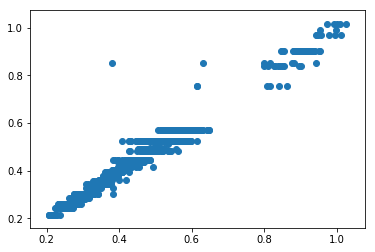

In [21]:
plt.figure()
plt.scatter(ytest, y1)

In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y1))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y1))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(ytest, y1)))

Mean Absolute Error: 0.01534647183754403
Mean Squared Error: 0.0006004856879478517
Root Mean Squared Error: 0.02450480948605501


In [23]:
fanalysis = ExtraTreesRegressor(max_depth=3, 
                                random_state=3393)

In [24]:
fanalysis.fit(X, Y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=3,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=3393, verbose=0, warm_start=False)

In [25]:
print(fanalysis.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00857815 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.33037172 0.21520501 0.01258191 0.03524799
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00826018 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.02731194 0.
 0.02446267 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.01830143 0.         0.         0.         0.         0.
 0.10506348 0.0168429  0.         0.         0.         0.
 0.         0.         0.0076556  0.         0. 

In [26]:
feats = fanalysis.feature_importances_
range(len(feats))

range(0, 191)

In [27]:
fanalysis.decision_path(X)

(<7952x150 sparse matrix of type '<class 'numpy.int64'>'
 	with 318080 stored elements in Compressed Sparse Row format>,
 array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150], dtype=int32))

In [28]:
fanalysis.score(X, Y)

0.964984089056406

In [29]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

In [30]:
clf = GradientBoostingRegressor(**params)

In [31]:
clf.fit(xtrain, ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [ ]:
y1 = clf.predict(xtest)

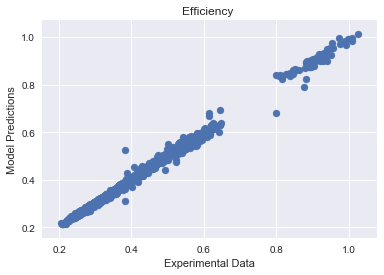

In [44]:
sns.set()
plt.figure()
plt.scatter(ytest, y1)
plt.title("Efficiency ")
plt.xlabel("Experimental Data")
plt.ylabel("Model Predictions")
plt.savefig('r2_values.png', bbox_inches='tight')

In [32]:
mse = mean_squared_error(ytest, clf.predict(xtest))

In [33]:
print('MSE: %.4f' % mse)

MSE: 0.0001


In [34]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

In [35]:
for i, ypred in enumerate(clf.staged_predict(xtest)):
    test_score[i] = clf.loss_(ytest, ypred)

Text(0,0.5,'Deviance')

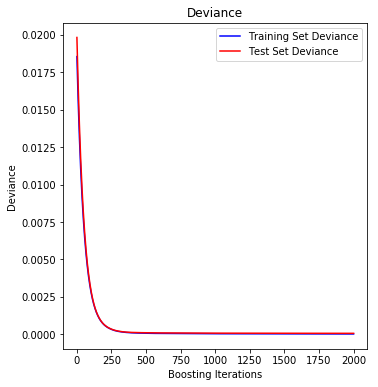

In [36]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

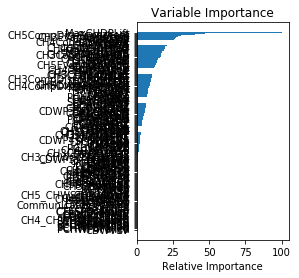

In [37]:
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1,2,1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, bas.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [38]:
x = bas.columns[sorted_idx]

In [39]:
print(x)

Index(['CDWVLV', 'PCHWP4Failed', 'PCHWP5Failed', 'SCHWP3Failed', 'SCHWP3S',
       'SCHWP3SS', 'SCHWP4Failed', 'SCHWP4S', 'SCHWP4SS', 'SCHWP5Failed',
       ...
       'CDWP5HZ', 'CH4CondApproach', 'CT5HZ', 'CHWRT', 'CDWP5SPD', 'CHWDP2',
       'CH3EvapApproach', 'CH5DISTEMP', 'CH5CompDiscSuperheat', 'MaxCHDPLift'],
      dtype='object', length=191)


In [40]:
print(sorted_idx)

[  0  32  37  42  44  46  47  49  51  52  27 123  57 114  63 103  69  75
  76  80  87 120 147  83  11  15  12  19  10  18 153 171 188   1 172 156
  82 182 187 185  34 150  74 118  41 189 151 124 164 117  39 170 186 136
  62  31 137 138 102  54  68 125  36 152  71  33  65 149 148 154  73  59
  89  29  60  92  94 104 135  40 113 127 159 145 190 184  56  85  67 146
 160  58 121 141 180 169 173 109 181  91 155  96 183  38  64 126 162  35
  66 157 178  79 133 166 168 177  61  78  98  28  53  25 134  88  55  17
 158 129  81  30  16   8  77  93   7  13  90  23  95 139 175 144  22   9
  14 119 106 110 130 142 143 161  97 100 115  43 131  45  99   5 179   3
 108 167  48 101 122  50 112 107   6 165 116  21  24 132 105 128  86 163
  26  70 140  84   4  72   2 111 176 174  20]


In [41]:
print(feature_importance[sorted_idx])
imp = feature_importance[sorted_idx]

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.66035824e-03 7.28845430e-03 8.14811468e-03 2.13067060e-02
 2.18681393e-02 2.28944627e-02 2.46157806e-02 3.04876240e-02
 3.93644100e-02 4.43988588e-02 4.72249039e-02 5.60333826e-02
 5.68387360e-02 6.04502501e-02 6.06975323e-02 7.60419796e-02
 7.92775410e-02 8.33066942e-02 1.15310951e-01 1.28646572e-01
 1.35677430e-01 1.72896420e-01 1.86480397e-01 1.93815309e-01
 2.05309310e-01 2.13528352e-01 2.20398171e-01 2.43805332e-01
 2.90373700e-01 5.042402

In [42]:
df_plt1_feats = pd.DataFrame({'feature_name': x, 'feat_import': imp})

In [43]:
df_plt1_feats

,feat_import,feature_name
0,0.000000,CDWVLV
1,0.000000,PCHWP4Failed
2,0.000000,PCHWP5Failed
3,0.000000,SCHWP3Failed
4,0.000000,SCHWP3S
5,0.000000,SCHWP3SS
6,0.000000,SCHWP4Failed
7,0.000000,SCHWP4S
8,0.000000,SCHWP4SS
9,0.000000,SCHWP5Failed


How does tree depth affect the r2 values?

In [37]:
pars = np.arange(2, 15, 2)
pars

array([ 2,  4,  6,  8, 10, 12, 14])

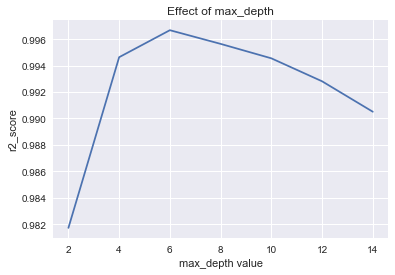

In [38]:
pars = np.arange(2, 15, 2)

scores = []
for n in pars:
    params1 = {'n_estimators': 450, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
    clf = GradientBoostingRegressor(**params1, max_depth=n)
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    test_score = r2_score(ytest, ypred)
    scores.append(test_score)

sns.set()
plt.title("Effect of max_depth")
plt.xlabel("max_depth value")
plt.ylabel("r2_score")
plt.plot(pars, scores)

How does minimum sample split affect r2 values?

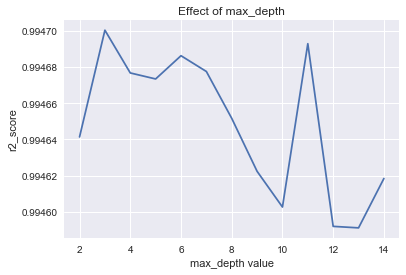

In [45]:
pars = np.arange(2, 15, 1)

scores = []
for n in pars:
    params1 = {'n_estimators': 450, 'max_depth':4,
          'learning_rate': 0.01, 'loss': 'ls'}
    clf = GradientBoostingRegressor(**params1, min_samples_split=n)
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    test_score = r2_score(ytest, ypred)
    scores.append(test_score)

sns.set()
plt.title("Effect of max_depth")
plt.xlabel("max_depth value")
plt.ylabel("r2_score")
plt.plot(pars, scores)

How does the number of estimators affect r2 values?

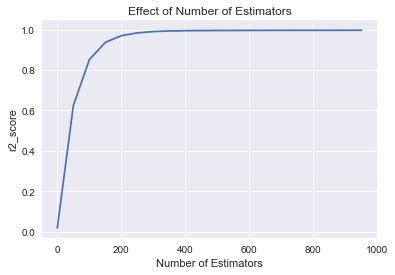

In [47]:
pars = np.arange(1, 1000, 50)

scores = []
for n in pars:
    params1 = {'max_depth':4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
    clf = GradientBoostingRegressor(**params1, n_estimators=n)
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    test_score = r2_score(ytest, ypred)
    scores.append(test_score)

sns.set()
plt.title("Effect of Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("r2_score")
plt.plot(pars, scores)